# Matplotlib - 2D plotting in OOP

Modified from [Scientific Python Lectures](http://github.com/jrjohansson/scientific-python-lectures) by J.R. Johansson (jrjohansson at gmail.com).

The main idea with __object-oriented programming__ is to have objects that one can apply functions and actions on. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.linspace(0,10,100)
y = x*x + 2.

Text(0.5,1,'title')

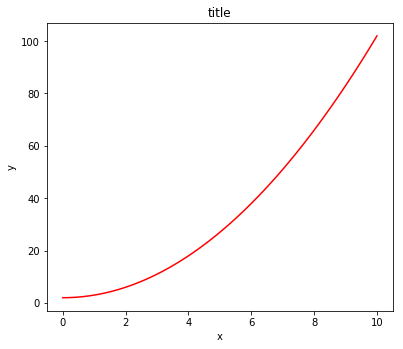

In [5]:
fig = plt.figure()

axes = fig.add_axes([0.2, 0.1, 0.8, 1.0]) # left, bottom, width, height
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

To use the object-oriented API, we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

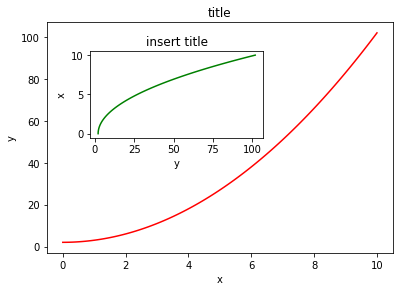

In [5]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib.

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_o

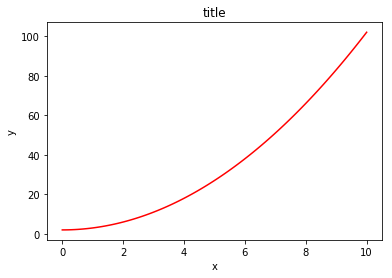

In [6]:
fig, axes = plt.subplots()
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
dir(axes)

<class 'numpy.ndarray'> (2,)


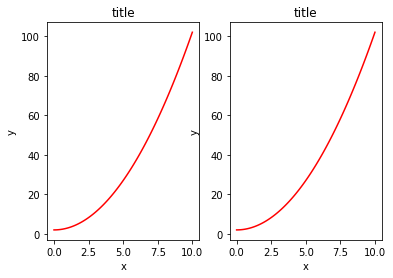

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)
print(type(axes), axes.shape)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

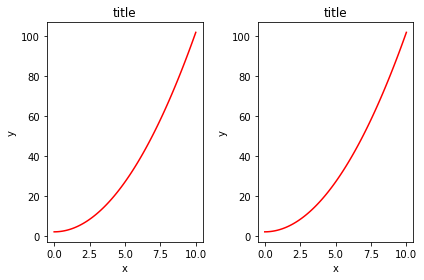

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

#### Use the add_subplot function to manage the layout of plots

In [8]:
# Define the sinc function, with output for x=0 defined
# as a special case to avoid division by zero. The code
# below defining the sinc function is developed and
# explained in Chapter 7, Section 1.
def s(x):
  a = np.where(x==0., 1., np.sin(x)/x)
  return a

import numpy as np
import matplotlib.pyplot as plt
# create arrays for plotting
x = np.arange(0., 10., 0.1)
y = np.exp(x)

t = np.linspace(-10., 10., 100)
z = s(t)

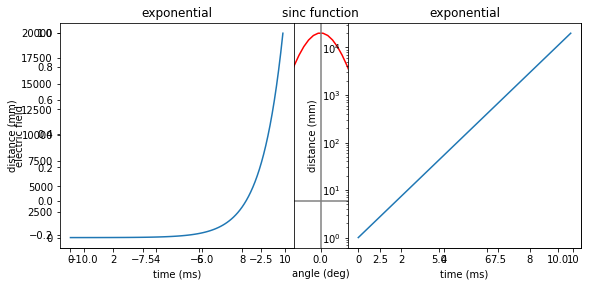

In [11]:
# create a figure window
fig = plt.figure(1, figsize=(9,8))

# subplot: wide subplot of sinc function
ax3 = fig.add_subplot(2,1,1)
ax3.plot(t, z, 'r')
ax3.axhline(color='gray')
ax3.axvline(color='gray')
ax3.set_xlabel('angle (deg)')
ax3.set_ylabel('electric field')
ax3.set_title('sinc function')
# subplot: linear plot of exponential
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, y)
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('distance (mm)')
ax1.set_title('exponential')

# subplot: semi-log plot of exponential
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, y)
ax2.set_yscale('log')
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('distance (mm)')
ax2.set_title('exponential')




# Adjusts white space to avoid collisions between subplots
fig.tight_layout()

The MatPlotLib statement above creates a **Figure** object, assigns it the name `fig`, and opens a blank figure window. Thus, just as we give lists, arrays, and numbers variable names, we can give a figure object and the window in creates a name: here it is `fig`.

The `fig.add_subplot(2,2,1)` is a MatPlotLib function that divides the figure window into 2 rows (the first argument) and 2 columns (the second argument). The third argument creates a subplot in the first of the 4 subregions (*i.e.* of the 2 rows $\times$ 2 columns) created by the `fig.add_subplot(2,2,1)` call. 

Writing `ax1 = fig.add_subplot(2,2,1)` assigns the name ax1 to the axes in the upper left quadrant of the figure window.

The `ax1.plot(x, y)` directs Python to plot the previously-defined `x` and `y` arrays onto the axes named `ax1`. 

The `ax2 = fig.add_subplot(2,2,2)` draws axes in the second, or upper right, quadrant of the figure window. 

The `ax3 = fig.add_subplot(2,1,2)` divides the figure window into 2 rows (first argument) and 1 column (second argument), creates axes in the second or these two sections, and assigns those axes (*i.e.* that subplot) the name `ax3`. 

That is, it divides the figure window into 2 halves, top and bottom, and then draws axes in the half number 2 (the third argument), or lower half of the figure window.

You may have noticed in above code that some of the function calls are a bit different from those used before: `xlabel("time (ms)")` becomes `set_xlabel("time (ms)")`, `title("exponential")` becomes `set_title("exponential")`, *etc.*

The call `ax2.set_yscale('log')` sets the $y$-axes in the second plot to be logarithmic, thus creating a semi-log plot. Creating properly-labeled logarthmic axes like this is more straightforward with the advanced syntax illustrated in the above example.

Using the prefixes `ax1`, `ax2`, or `ax3`, direct graphical instructions to their respective subplots. By creating and specifying names for the different figure windows and subplots within them, you access the different plot windows more efficiently.

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [11]:
fig.savefig("filename.pdf")

Here we can also optionally specify the DPI and choose between different output formats:

In [12]:
fig.savefig("filename.png", dpi=500)

# [Exercise 12](EX12-OOP-matplotlib.ipynb)

# legends

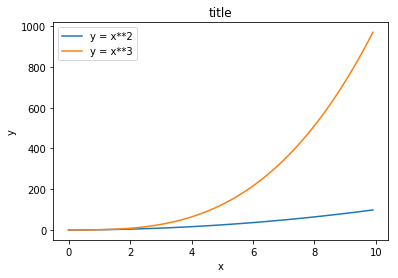

In [13]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=0); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

In [14]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4); # lower right corner
# .. many more options are available
ax.legend(loc=(.1,.2)); # an arbitrary location

### Formatting text: LaTeX, fontsize, font family

In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

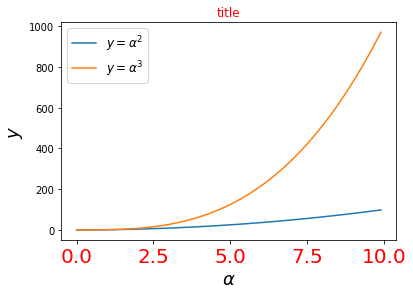

In [13]:
fig, ax = plt.subplots()

ax.plot(x, x**2,label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2, fontsize=12) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title',fontsize=12,color='red');
ax.tick_params(axis='x', labelcolor='r',labelsize=20)

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [16]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'Arial'})

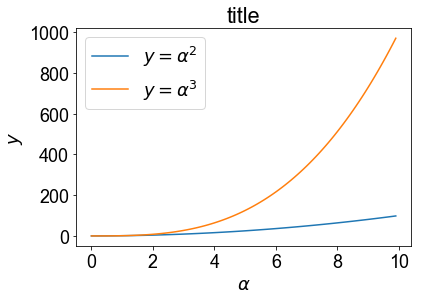

In [17]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [18]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [19]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

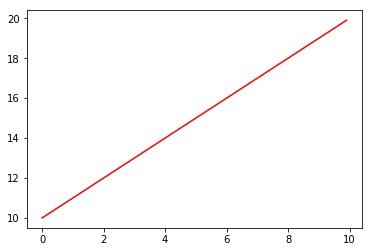

In [16]:
fig, ax = plt.subplots()

ax.plot(x, x+10, color="red", alpha=1.) # half-transparant red

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

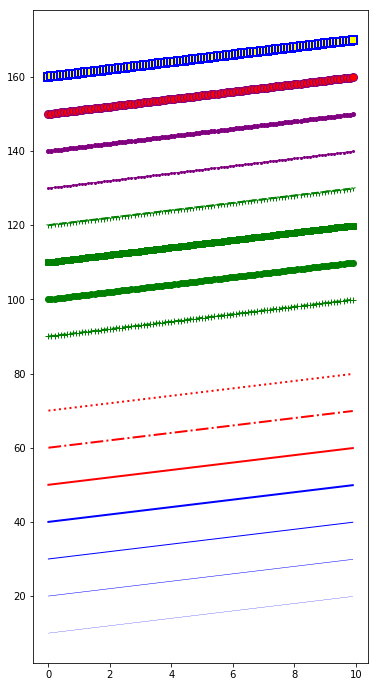

In [17]:
fig, ax = plt.subplots(figsize=(6,12))

ax.plot(x, x+10, color="blue", linewidth=0.25)
ax.plot(x, x+20, color="blue", linewidth=0.50)
ax.plot(x, x+30, color="blue", linewidth=1.00)
ax.plot(x, x+40, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+50, color="red", lw=2, linestyle='-')
ax.plot(x, x+60, color="red", lw=2, ls='-.')
ax.plot(x, x+70, color="red", lw=2, ls=':')

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 90, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+100, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+110, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+120, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+130, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+140, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+150, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+160, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object:

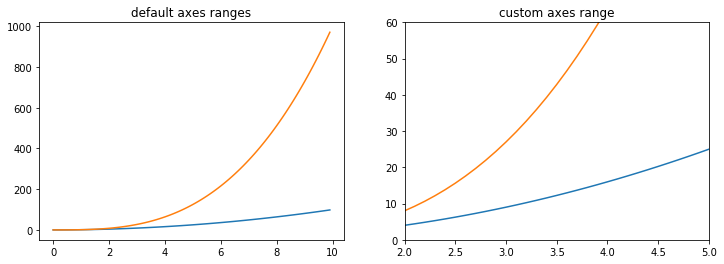

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].set_ylim([0, 60])
axes[1].set_xlim([2, 5])
axes[1].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

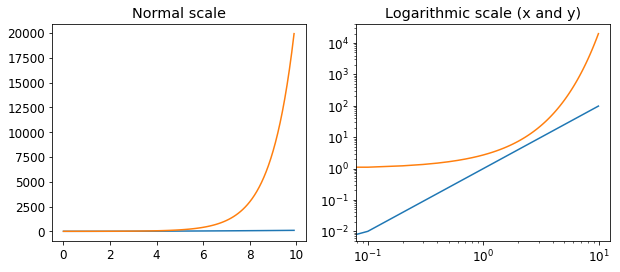

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_title("Logarithmic scale (x and y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

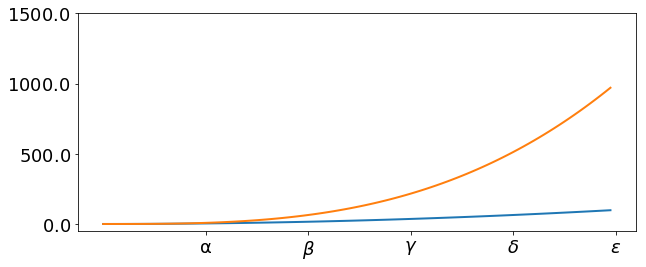

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks(np.asarray([1, 2, 3, 4, 5])*2)
ax.set_xticklabels([r'$\mathdefault{\alpha}$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 500, 1000, 1500]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

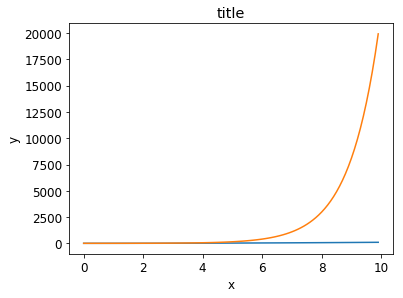

In [26]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
#ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

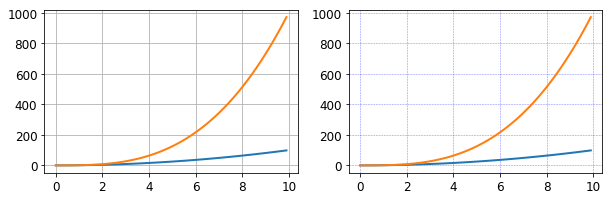

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
#axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].grid(color='b', alpha=0.5, linestyle='--', linewidth=0.5)

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

Text(0,0.5,'volume $(m^3)$')

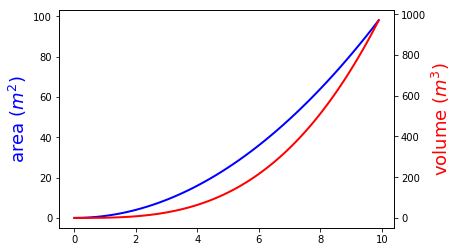

In [16]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")

### Axes where x and y is zero

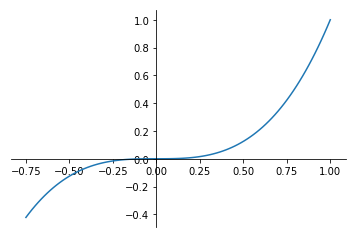

In [19]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0.0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0.0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

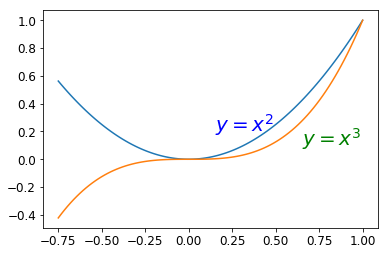

In [33]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [30]:
n = np.array([0,1,2,3,4,5])

Text(0.5,1,'bar')

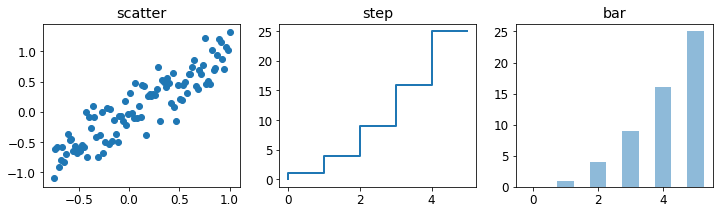

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

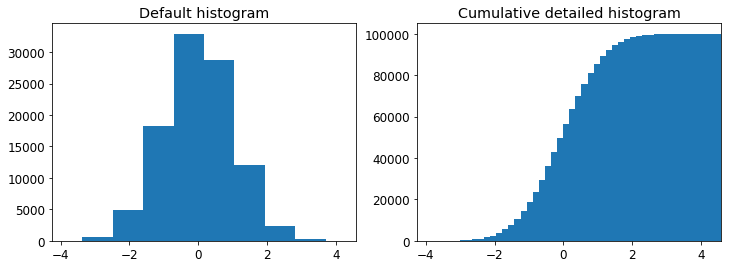

In [32]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## What types of plots are possible in Matplotlib?

https://matplotlib.org/gallery.html

# [Matplotlib cheatsheet](https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet)